COMP396: Molecular property prediction with bag of bonds representation

D. C. Elton, Z. Boukouvalas, M. S. Butrico, M. D. Fuge, and P. W. Chung, “Applying machine learning techniques to predict the properties of energetic materials”, Scientific Reports 8, 9059 (2018).

In [1]:
#Installing dependencies for RDKit
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2019-12-07 23:37:40--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71785000 (68M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  68.46M   153MB/s    in 0.4s    

2019-12-07 23:37:40 (153 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [71785000/71785000]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.13.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_

In [0]:
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root = "/content/drive/My Drive/dsb2/"




In [6]:
file_list = os.listdir(root)

num_mols = len(file_list)
print(num_mols)

13000


In [0]:
def read_xyz(file_name):
    with open(file_name, 'rb') as file:
        num_atoms = int(file.readline())
        properties = file.readline().split()[5:17] # only take the properties used in the experiments 
        properties = [num.replace(b'*^', b'e') for num in properties] 
        properties = [float(prop) for prop in properties]
        atom_types = [0]*num_atoms
        coords = np.array(np.zeros([num_atoms,3]))
        for na in range(num_atoms):
            coord_line = file.readline().split()
            atom_types[na] = coord_line[0]
            xyz_coords = coord_line[1:4]
            xyz_coords = [num.replace(b'*^', b'e') for num in xyz_coords] 
            coords[na,:] = [float(num) for num in xyz_coords]  
        vib_freqs = file.readline()
        smiles = file.readline().split()[0]
        inchis = file.readline()
        
    return smiles, properties, atom_types, coords


In [0]:
import concurrent.futures
from concurrent.futures import ProcessPoolExecutor
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import as_completed

In [9]:
import multiprocessing as mp
import numpy as np
from multiprocessing.pool import ThreadPool
import time


start = time.time()
N= mp.cpu_count()
files = os.scandir(root)
print (N)
with mp.pool.ThreadPool(processes = 8) as p:
        results= p.map(read_xyz, [root+file.name for file in files])
        #print (results[1][2])
      
end = time.time()
print(end - start)

2
618.2859110832214


In [10]:
print(len(results))

13000


In [0]:
def column(matrix, i):
    return [row[i] for row in matrix]

smiles =column(results,0)
properties =column(results,1)
atom_types =column(results,2)
coords = column(results,3)

In [12]:
#Data exploration
print(smiles[1])
print(properties[1])
print(atom_types[1])
print(coords[1])

b'CC1(O)C=CC2OC12'
[1.8866, 64.52, -0.2485, -0.0075, 0.2409, 794.2784, 0.129457, -383.721976, -383.71463, -383.713685, -383.753023, 28.544]
[b'C', b'C', b'O', b'C', b'C', b'C', b'O', b'C', b'H', b'H', b'H', b'H', b'H', b'H', b'H', b'H']
[[-0.06341412  1.56275908  0.03506823]
 [ 0.00561536  0.03456272 -0.01205842]
 [-1.30159989 -0.54324469  0.03859584]
 [ 0.81463752 -0.48687451 -1.19581887]
 [ 1.81354605 -1.28946524 -0.82298699]
 [ 1.86092036 -1.3929298   0.66677517]
 [ 2.09945262 -0.11784784  1.31977992]
 [ 0.75759285 -0.57216935  1.17934164]
 [ 0.9381555   1.98636251  0.13946968]
 [-0.51133516  1.95869054 -0.88413381]
 [-0.67889015  1.88266485  0.8809463 ]
 [-1.80625322 -0.2045079  -0.70848753]
 [ 0.59397466 -0.18025257 -2.21376596]
 [ 2.52380852 -1.77595518 -1.48019413]
 [ 2.27026821 -2.25559632  1.18237105]
 [ 0.20604051 -0.78087806  2.09198005]]


In [0]:
import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions 

In [0]:
DrawingOptions.bondLineWidth=2.0
sample= Chem.MolFromSmiles(smiles[1])

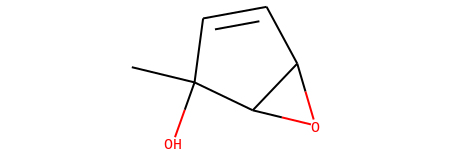

In [15]:
sample

In [0]:
from rdkit import Chem

mol_list = [Chem.AddHs(Chem.MolFromSmiles(smile)) for smile in smiles]

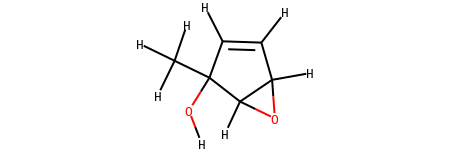

In [17]:
#Represent molecule with hydrogen explicitly 
mol_list[1]

In [18]:
!git clone https://github.com/bmbodj/mmltoolkit.git

Cloning into 'mmltoolkit'...
remote: Enumerating objects: 205, done.
remote: Total 205 (delta 0), reused 0 (delta 0), pack-reused 205
Receiving objects: 100% (205/205), 78.42 KiB | 472.00 KiB/s, done.
Resolving deltas: 100% (135/135), done.


In [19]:
!ls mmltoolkit

examples  LICENSE  mmltoolkit  README.md  setup.py


In [0]:
# Add these modules to my mounted path
sys.path.append('/content/drive/My Drive/')

In [0]:
file_name=[0]*num_mols

for im in range(num_mols):
   file_name[im]=root+file_list[im]

In [0]:
import numpy as np
import copy
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem.rdmolops import Get3DDistanceMatrix, GetAdjacencyMatrix, GetDistanceMatrix
from rdkit.Chem.Graphs import CharacteristicPolynomial
from rdkit.Chem.Descriptors import _descList
from collections import defaultdict
from mmltoolkit.mmltoolkit.fingerprints import truncated_Estate_featurizer
from mmltoolkit.mmltoolkit.descriptors import RDKit_descriptor_featurizer
from mmltoolkit.mmltoolkit.functional_group_featurizer import functional_group_featurizer
atom_num_dict = {'C':6,'N':7,'O':8,'H':1,'F':9, 'Cl': 17, 'S': 16 }

#----------------------------------------------------------------------------
def bag_of_bonds(filename_list, verbose=False):
    """
    REF:
        Hansen, et al., The Journal of Physical Chemistry Letters 2015 6 (12), 2326-2331
        DOI: 10.1021/acs.jpclett.5b00831, URL: http://pubs.acs.org/doi/abs/10.1021/acs.jpclett.5b00831
    Args:
        filename_list : a list containing strings for all of the .xyz input filenames
    Returns:
        feature_names : a (long) list of strings describing which bag each element of the feature vector is part of
        X_LBoB : a NumPy array containing the feature vectors of shape (num_mols, num_bond_types)
    """
    import copy

    num_mols = len(filename_list)
    print(num_mols)
  
    #------- initialize empty dictionary for storing each bag as a list -----
    atom_types = ['C', 'N', 'O', 'F', 'H']
    num_atom_types = len(atom_types)
    
    if (verbose): print("Intialized dictionary ..")
    empty_BoB_dict = {}
    for atom_type in atom_types:
        empty_BoB_dict[atom_type] = [] #initialize empty list
    if (verbose): print("Intialized empty list")
    for i in range(num_atom_types):
        for j in range(i,num_atom_types):
            empty_BoB_dict[atom_types[i]+atom_types[j]] = [] #initialize empty list
   
    #------------- fill dicts in dict list ------------------------------------
    BoB_dict_list = []
    if (verbose): print("creating intial BoBs")
    print("created dictioary list")
    for m, filename in enumerate(filename_list):
        xyzfile = open(filename, 'r',encoding="utf-8")
        num_atoms_file = int(xyzfile.readline())
        skipline=xyzfile.readline()
        Cmat = np.zeros((num_atoms_file,num_atoms_file))
        xyzmatrix =np.array(np.zeros([num_atoms_file,3]))
        atom_symbols = [0]*num_atoms_file
        for na in range(num_atoms_file):
            coord_line =xyzfile.readline().split()
            atom_symbols[na] = coord_line[0]
            xyz_coords = coord_line[1:4] 
            xyz_coords = [num.replace('*^', 'e') for num in xyz_coords] 
            xyzmatrix[na,:] = [float(num) for num in xyz_coords] 
        xyzfile.close()
        chargearray = [atom_num_dict[symbol] for symbol in atom_symbols]
 
        BoB_dict = copy.deepcopy(empty_BoB_dict)
     #------- populate BoB dict ------------------------------------------
        for i in range(num_atoms_file):
            for j in range(i, num_atoms_file):
                if i == j:
                    BoB_dict[atom_symbols[i]] += [0.5*chargearray[i]**2.4] #concactenate to list
                else:
                    dict_key = atom_symbols[i]+atom_symbols[j]
                    dist=np.linalg.norm(xyzmatrix[i,:] - xyzmatrix[j,:])
                    CM_term = chargearray[i]*chargearray[j]/dist
                    try:
                        BoB_dict[dict_key] += [CM_term] #concactenate to list
                    except KeyError:
                        dict_key = atom_symbols[j]+atom_symbols[i]
                        BoB_dict[dict_key] += [CM_term] #concactenate to list

        BoB_dict_list += [BoB_dict]
      
      

    #------- tricky processing stage - zero pad all bags so they all have the same length
    #------- and then cocatenate all bags into a feature vector for each molecule

    #For each key in the dict, zero pad the bags, and do this for all molecules
    #also sum these up to get the total length of the final feature vector
    feature_vect_length = 0

    if (verbose): print("finding max length of each bag and padding")

    for key in BoB_dict_list[0].keys():
        max_length = 0
        #find max bag length
        for i in range(num_mols):
            length = len(BoB_dict_list[i][key])
            if (length > max_length):
                max_length = length

        if (verbose): print("max length of ", key, "is", max_length)
        #zero pad each bag
        for i in range(num_mols):
            pad_width = max_length - len(BoB_dict_list[i][key])
            BoB_dict_list[i][key] = BoB_dict_list[i][key]+[0]*pad_width
        feature_vect_length += max_length

    #initialize Numpy feature vector array
    X_BoB = np.zeros((num_mols, feature_vect_length))

    #concatenation of all bags
    if (verbose): print("concatenating the bags")
    for m in range(num_mols):
        featvec = []
        for key in BoB_dict_list[m].keys():
            featvec += sorted(BoB_dict_list[m][key], reverse=True) #Sort (finally)
        X_BoB[m,:] = np.array(featvec)

    #concatenate feature names
    feature_names = []
    for key in BoB_dict_list[0].keys():
        for element in BoB_dict_list[0][key]:
            feature_names += [key]
    
    return feature_names, X_BoB

In [23]:
file_list = os.listdir(root)

num_mols = len(file_list)
print(num_mols)

13000


In [0]:
file_name=[0]*(num_mols)

for im in range(num_mols):
   file_name[im]=root+file_list[im]

In [25]:
print (file_name)

['/content/drive/My Drive/dsb2/dsgdb9nsd_012001.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012002.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012004.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012010.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012009.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012006.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012008.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012007.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012005.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012003.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012012.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012011.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012020.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012019.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012015.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012017.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012013.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_012016.xyz', '/content/drive/My Drive/dsb2/dsgdb9nsd_01201

In [26]:
BoB_feature_list, X_BoB = bag_of_bonds(file_name, verbose=False)

13000
created dictioary list


In [27]:
BoB_feature_list

['C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'O',
 'O',
 'O',
 'O',
 'F',
 'F',
 'F',
 'F',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CC',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CO',
 'CO',
 'CO',
 'CO',
 'CO',
 'CO',
 'CO',
 'CO',
 'CO',
 'CO',
 'CO',
 'CO',
 'CO',
 'CO',
 'CO',
 'CO',
 'CF',
 'CF',
 'CF',
 'CF',
 'CF',
 'CF',
 'CF',
 'CF',
 'CF',
 'CF',
 'CF',
 'CF',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH',
 'CH

In [28]:
X_BoB

array([[36.8581052, 36.8581052, 36.8581052, ...,  0.       ,  0.       ,
         0.       ],
       [36.8581052, 36.8581052, 36.8581052, ...,  0.       ,  0.       ,
         0.       ],
       [36.8581052, 36.8581052, 36.8581052, ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [36.8581052, 36.8581052, 36.8581052, ...,  0.       ,  0.       ,
         0.       ],
       [36.8581052, 36.8581052, 36.8581052, ...,  0.       ,  0.       ,
         0.       ],
       [36.8581052, 36.8581052, 36.8581052, ...,  0.       ,  0.       ,
         0.       ]])

In [29]:
print(X_BoB.shape)

(13000, 554)


In [0]:
import pandas as pd
import numpy as np

In [31]:
dtype = [('Col1','int32'), ('Col2','float32'), ('Col3','float32'),('Col4','int32'), ('Col5','float32'), ('Col6','float32'),('Col7','int32'), ('Col8','float32'), ('Col9','float32'),('Col10','int32'), ('Col11','float32'), ('Col12','float32'),('Col13','float32'), ('Col14','float32'),('Col15','float32'), ('Col16','float32'),('Col17','float32')]
values = properties
index = ['Row'+str(i) for i in range(1, len(values)+1)]

df = pd.DataFrame(values, index=index)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
Row1,0.3676,68.74,-0.2352,0.0065,0.2417,814.7537,0.142229,-363.839405,-363.831976,-363.831032,-363.870471,29.280
Row2,1.8866,64.52,-0.2485,-0.0075,0.2409,794.2784,0.129457,-383.721976,-383.714630,-383.713685,-383.753023,28.544
Row3,1.7780,73.30,-0.2542,0.0838,0.3380,883.2429,0.177401,-349.011613,-349.003832,-349.002888,-349.042983,30.929
Row4,1.2074,73.61,-0.2583,0.0729,0.3312,881.9664,0.177890,-349.011971,-349.004251,-349.003307,-349.043189,31.339
Row5,2.1403,66.86,-0.2510,0.0868,0.3378,831.9533,0.152815,-384.933448,-384.925779,-384.924835,-384.964883,29.600


In [32]:
len(df)

13000

In [0]:
y_mu_original=df[df.columns[0]]
y_alpha_original=df[df.columns[1]]
y_homo_original=df[df.columns[2]]
y_lumo_original=df[df.columns[3]]
y_gap_original=df[df.columns[4]]
y_R2_original=df[df.columns[5]]
y_zpve_original=df[df.columns[6]]
y_u0_original=df[df.columns[7]]
y_u_original=df[df.columns[8]]
y_h_original=df[df.columns[9]]
y_g_original=df[df.columns[10]]
y_cv_original=df[df.columns[11]]

In [34]:
print(y_mu_original.mean())
print(y_alpha_original.mean())
print(y_homo_original.mean())
print(y_lumo_original.mean())
print(y_gap_original.mean())
print(y_R2_original.mean())
print(y_zpve_original.mean())
print(y_u0_original.mean())
print(y_u_original.mean())
print(y_h_original.mean())
print(y_g_original.mean())
print(y_cv_original.mean())

2.6208590538461416
65.3638292307689
-0.2448003230769218
0.013337476923076887
0.2581376307692299
955.4662350153832
0.1321418784615383
-360.48039873907845
-360.4725528390758
-360.4716086518468
-360.51276671792044
28.417438230769243


In [35]:
print(y_mu_original.std())
print(y_alpha_original.std())
print(y_homo_original.std())
print(y_lumo_original.std())
print(y_gap_original.std())
print(y_R2_original.std())
print(y_zpve_original.std())
print(y_u0_original.std())
print(y_u_original.std())
print(y_h_original.std())
print(y_g_original.std())
print(y_cv_original.std())

1.505066053597753
8.968654582857408
0.025137685533687216
0.047528939266441986
0.04864815968886159
246.86374348679843
0.03361785349322071
43.490377935992434
43.489925214476855
43.48992521019698
43.49123697352441
4.545093871525309


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled=scaler.fit_transform(df)
df = pd.DataFrame(data_scaled , index=index)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
Row1,-1.497174,0.376456,0.381924,-0.143865,-0.337901,-0.570023,0.300064,-0.077239,-0.077249,-0.077249,-0.077207,0.189786
Row2,-0.487877,-0.094090,-0.147182,-0.438433,-0.354346,-0.652968,-0.079868,-0.534428,-0.534445,-0.534445,-0.534387,0.027847
Row3,-0.560036,0.884913,-0.373942,1.482575,1.641695,-0.292575,1.346334,0.263719,0.263720,0.263720,0.263736,0.552609
Row4,-0.939170,0.919479,-0.537050,1.253233,1.501910,-0.297746,1.360880,0.263710,0.263710,0.263710,0.263732,0.642819
Row5,-0.319307,0.166829,-0.246638,1.545697,1.637584,-0.500348,0.614968,-0.562285,-0.562295,-0.562295,-0.562253,0.260194


In [0]:
from sklearn import preprocessing
X=X_BoB
y_mu=df[df.columns[0]]
y_alpha=df[df.columns[1]]
y_homo=df[df.columns[2]]
y_lumo=df[df.columns[3]]
y_gap=df[df.columns[4]]
y_R2=df[df.columns[5]]
y_zpve=df[df.columns[6]]
y_u0=df[df.columns[7]]
y_u=df[df.columns[8]]
y_h=df[df.columns[9]]
y_g=df[df.columns[10]]
y_cv=df[df.columns[11]]

In [0]:
y_all=df

In [39]:
y_all.std()

0     1.000038
1     1.000038
2     1.000038
3     1.000038
4     1.000038
5     1.000038
6     1.000038
7     1.000038
8     1.000038
9     1.000038
10    1.000038
11    1.000038
dtype: float64

In [40]:
print(y_mu.mean())
print(y_alpha.mean())
print(y_homo.mean())
print(y_lumo.mean())
print(y_gap.mean())
print(y_R2.mean())
print(y_zpve.mean())
print(y_u0.mean())
print(y_u.mean())
print(y_h.mean())
print(y_g.mean())
print(y_cv.mean())

1.5978671377489754e-16
-5.017695660678957e-16
-6.3860028376439e-16
6.803105087818459e-17
-4.1445479526968342e-16
-6.09478279810761e-16
4.629800816229153e-16
-8.444697932383441e-16
-1.3275363714298622e-15
-3.1954780701845755e-16
1.6757279324836488e-15
5.0387044963757104e-18


In [41]:
print(y_mu.std())
print(y_alpha.std())
print(y_homo.std())
print(y_lumo.std())
print(y_gap.std())
print(y_R2.std())
print(y_zpve.std())
print(y_u0.std())
print(y_u.std())
print(y_h.std())
print(y_g.std())
print(y_cv.std())

1.0000384637575404
1.000038463757541
1.0000384637575386
1.000038463757541
1.0000384637575381
1.000038463757538
1.00003846375754
1.0000384637575395
1.0000384637575388
1.0000384637575417
1.0000384637575381
1.0000384637575388


In [111]:
# Split X and y into training and testing/validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_mu, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 554)
(1950, 554)
(11050,)
(1950,)


In [0]:
#Kernel ridge regression 
from sklearn.kernel_ridge import KernelRidge
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_mu=clf.predict(X_test)

In [0]:
# Import metrics to calculate accuracy
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [114]:
print("Mean absolute for kernel ridge regression :")
mae_mu = mean_absolute_error(y_test,y_pred_krr_mu)
print(mae_mu)

Mean absolute for kernel ridge regression :
0.4468009238603941


In [115]:
print("Mean absolute for kernel ridge regression :")
mae_muc = mean_absolute_error(y_test *y_mu_original.std(),y_pred_krr_mu *  y_mu_original.std())
print(mae_muc)

Mean absolute for kernel ridge regression :
0.6724649032183935


In [116]:
# Split X and y into training and testing/validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_alpha, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 554)
(1950, 554)
(11050,)
(1950,)


In [0]:
X_scaled = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_traindtm=scaler.transform(X_train) 
X_testdtm=scaler.transform(X_test)

In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_traindtm, y_train)
y_pred_krr_alpha=clf.predict(X_testdtm)

In [119]:
print("Mean absolute error for kernel ridge regression :")
mae_alpha = mean_absolute_error(y_test,y_pred_krr_alpha)
print(mae_alpha)

Mean absolute error for kernel ridge regression :
0.08677907923250712


In [120]:
print("Mean absolute error for kernel ridge regression :")
mae_alphac = mean_absolute_error(y_test * y_alpha_original.std(),y_pred_krr_alpha * y_alpha_original.std() )
print(mae_alphac)

Mean absolute error for kernel ridge regression :
0.778291586654771


In [121]:
# Split X and y into training and testing/validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_homo, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 554)
(1950, 554)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_homo=clf.predict(X_test)

In [123]:
print("Mean absolute error for kernel ridge regression :")
mae_homo = mean_absolute_error(y_test,y_pred_krr_homo)
print(mae_homo)

Mean absolute error for kernel ridge regression :
0.29588854504533546


In [124]:
print("Mean absolute error for kernel ridge regression :")
mae_homoc = mean_absolute_error(y_test * y_homo_original.std() ,y_pred_krr_homo * y_homo_original.std())
print(mae_homoc)

Mean absolute error for kernel ridge regression :
0.007437953198369886


In [125]:
# Split X and y into training and testing/validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_lumo, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 554)
(1950, 554)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_lumo=clf.predict(X_test)

In [127]:
print("Mean absolute error for kernel ridge regression :")
mae_lumo = mean_absolute_error(y_test ,y_pred_krr_lumo )
print(mae_lumo)

Mean absolute error for kernel ridge regression :
0.22285336635487502


In [128]:
print("Mean absolute error for kernel ridge regression :")
mae_lumoc = mean_absolute_error(y_test * y_lumo_original.std(),y_pred_krr_lumo * y_lumo_original.std())
print(mae_lumoc)

Mean absolute error for kernel ridge regression :
0.010591984114803001


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y_gap, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 554)
(1950, 554)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_gap=clf.predict(X_test)

In [131]:
print("Mean absolute for kernel ridge regression :")
mae_gap = mean_absolute_error(y_test,y_pred_krr_gap)
print(mae_gap)

Mean absolute for kernel ridge regression :
0.2514246381113674


In [132]:
print("Mean absolute for kernel ridge regression :")
mae_gapc = mean_absolute_error(y_test * y_gap_original.std(),y_pred_krr_gap * y_gap_original.std())
print(mae_gapc)

Mean absolute for kernel ridge regression :
0.012231345944556035


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y_R2, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 554)
(1950, 554)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_R2=clf.predict(X_test)

In [135]:
print("Mean absolute for kernel ridge regression :")
mae_R2 = mean_absolute_error(y_test,y_pred_krr_R2)
print(mae_R2 )

Mean absolute for kernel ridge regression :
0.09020111517288852


In [136]:
print("Mean absolute for kernel ridge regression :")
mae_R2c = mean_absolute_error(y_test * y_R2_original.std(),y_pred_krr_R2 *y_R2_original.std())
print(mae_R2c) 
 

Mean absolute for kernel ridge regression :
22.267384958263115


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y_zpve, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 554)
(1950, 554)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_zpve=clf.predict(X_test)

In [139]:
print("Mean absolute error for kernel ridge regression :")
mae_zpve = mean_absolute_error(y_test,y_pred_krr_zpve)
print(mae_zpve)

Mean absolute error for kernel ridge regression :
0.023230727430898605


In [140]:
print("Mean absolute error for kernel ridge regression :")
mae_zpvec = mean_absolute_error(y_test * y_zpve_original.std(),y_pred_krr_zpve *  y_zpve_original.std())
print(mae_zpvec)


Mean absolute error for kernel ridge regression :
0.000780967191312893


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y_u0, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 554)
(1950, 554)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_u0=clf.predict(X_test)

In [143]:
print("Mean absolute error for kernel ridge regression :")
mae_u0 = mean_absolute_error(y_test,y_pred_krr_u0)
print(mae_u0)

Mean absolute error for kernel ridge regression :
0.01692389986670101


In [144]:
print("Mean absolute error for kernel ridge regression :")
mae_u0c = mean_absolute_error(y_test * y_u0_original.std(),y_pred_krr_u0 * y_u0_original.std())
print(mae_u0c)

Mean absolute error for kernel ridge regression :
0.7360268013537187


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y_u, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 554)
(1950, 554)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_u=clf.predict(X_test)

In [147]:
print("Mean absolute error for kernel ridge regression :")
mae_u = mean_absolute_error(y_test,y_pred_krr_u)
print(mae_u)

Mean absolute error for kernel ridge regression :
0.016923736733233944


In [148]:
print("Mean absolute error for kernel ridge regression :")
mae_uc = mean_absolute_error(y_test * y_u_original.std(),y_pred_krr_u * y_u_original.std())
print(mae_uc)

Mean absolute error for kernel ridge regression :
0.736012044877839


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y_h, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 554)
(1950, 554)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_h=clf.predict(X_test)

In [151]:
print("Mean absolute error for kernel ridge regression :")
mae_h = mean_absolute_error(y_test,y_pred_krr_h)
print(mae_h)

Mean absolute error for kernel ridge regression :
0.016923736591925635


In [152]:
print("Mean absolute error for kernel ridge regression :")
mae_hc = mean_absolute_error(y_test * y_h_original.std(),y_pred_krr_h * y_h_original.std())
print(mae_hc)

Mean absolute error for kernel ridge regression :
0.7360120386599198


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y_g, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 554)
(1950, 554)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_g=clf.predict(X_test)

In [155]:
print("Mean absolute error for kernel ridge regression :")
mae_g = mean_absolute_error(y_test,y_pred_krr_g)
print(mae_g)

Mean absolute error for kernel ridge regression :
0.016924348181038534


In [156]:
print("Mean absolute error for kernel ridge regression :")
mae_gc = mean_absolute_error(y_test * y_g_original.std(),y_pred_krr_g * y_g_original.std())
print(mae_gc)

Mean absolute error for kernel ridge regression :
0.7360608373639836


In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cv, test_size=0.15, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11050, 554)
(1950, 554)
(11050,)
(1950,)


In [0]:
clf = KernelRidge(alpha=1.0, kernel='laplacian',)
clf.fit(X_train, y_train)
y_pred_krr_cv=clf.predict(X_test)

In [163]:
print("Mean absolute error for kernel ridge regression :")
mae_cv = mean_absolute_error(y_test,y_pred_krr_cv)
print(mae_cv)

Mean absolute error for kernel ridge regression :
0.0914606716911106


In [164]:
print("Mean absolute error for kernel ridge regression :")
mae_cvc = mean_absolute_error(y_test * y_cv_original.std(),y_pred_krr_cv * y_cv_original.std())
print(mae_cvc)

Mean absolute error for kernel ridge regression :
0.4156973383888552


In [167]:
print("Mean absolute error for kernel ridge regression :")
d={'mu':mae_mu, 'alpha':mae_alpha,'homo':mae_homo, 'lumo':mae_lumo,'gap':mae_gap, 'R2':mae_R2,'zpve':mae_zpve,
                   'u0':mae_u0, 'u':mae_u,'gap':mae_gap, 'h':mae_h,'g':mae_g, 'cv':mae_cv}
result= pd.DataFrame(data=d, index=index)
result.head(1)

Mean absolute error for kernel ridge regression :


,mu,alpha,homo,lumo,gap,R2,zpve,u0,u,h,g,cv
Row1,0.446801,0.086779,0.295889,0.222853,0.251425,0.090201,0.023231,0.016924,0.016924,0.016924,0.016924,0.091461


In [165]:
print("Mean absolute error for kernel ridge regression adjusted :")
d2={'mu':mae_muc, 'alpha':mae_alphac,'homo':mae_homoc, 'lumo':mae_lumoc,'gap':mae_gapc, 'R2':mae_R2c,'zpve':mae_zpvec,
                   'u0':mae_u0c, 'u':mae_uc,'gap':mae_gapc, 'h':mae_hc,'g':mae_gc, 'cv':mae_cvc}
result2= pd.DataFrame(data=d2, index=index)
result2.head(1)

Mean absolute error for kernel ridge regression adjusted :


,mu,alpha,homo,lumo,gap,R2,zpve,u0,u,h,g,cv
Row1,0.672465,0.778292,0.007438,0.010592,0.012231,22.267385,0.000781,0.736027,0.736012,0.736012,0.736061,0.415697
